<a href="https://colab.research.google.com/github/oscarcortez/de-opa-1/blob/main/v2_criptocoin_bitcoin_oscar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install python-binance

In [ ]:
#!pip install PyYAML

In [ ]:
import pandas as pd
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import yaml

In [ ]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager

# you need to create secrets.yaml file like this:
'''
binance:
  api_key: your_api_key
  api_secret: your_api_secret
'''

with open('secrets.yaml', 'r') as file:
  secrets_data = yaml.safe_load(file)
api_key = secrets_data['binance']['api_key']
api_secret = secrets_data['binance']['api_secret']

client = Client(api_key, api_secret)

In [ ]:
# I chose 'every 5 minute' because less than that the line chart has many spikes and its not interpretable
data = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_5MINUTE, "1 day ago UTC")
df_data = pd.DataFrame(data)
df_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,1691500200000,29538.98000000,29597.09000000,29532.60000000,29578.00000000,224.45096000,1691500499999,6638175.00900270,4397,130.43140000,3857248.53587710,0
1,1691500500000,29578.00000000,29621.97000000,29577.99000000,29607.99000000,236.92063000,1691500799999,7014883.60759600,4473,130.95497000,3877185.82452200,0
2,1691500800000,29607.98000000,29607.99000000,29531.76000000,29548.68000000,420.70614000,1691501099999,12431936.86157450,5708,207.96732000,6144359.37345920,0
3,1691501100000,29548.67000000,29565.51000000,29472.60000000,29494.01000000,616.64537000,1691501399999,18197383.17247820,9340,260.07193000,7675034.98996430,0
4,1691501400000,29494.01000000,29513.69000000,29430.56000000,29446.81000000,585.17546000,1691501699999,17244645.71573040,9899,218.23969000,6430920.95579060,0
...,...,...,...,...,...,...,...,...,...,...,...,...
283,1691585100000,29949.01000000,30000.00000000,29949.01000000,29986.36000000,292.23440000,1691585399999,8761870.56073780,7076,188.49371000,5651346.48538860,0
284,1691585400000,29986.35000000,30037.71000000,29980.00000000,29997.65000000,382.71958000,1691585699999,11484776.09863280,7852,222.70389000,6682792.51962990,0
285,1691585700000,29997.65000000,30094.40000000,29986.01000000,30076.32000000,454.74458000,1691585999999,13666390.56647770,9316,299.98897000,9015343.68798670,0
286,1691586000000,30076.33000000,30160.00000000,29986.06000000,30016.51000000,882.88247000,1691586299999,26546811.87612050,15721,604.30381000,18173145.07718920,0


In [ ]:
# Convert miliseconds to timestamp
df_data[0] = pd.to_datetime(df_data[0], unit='ms')
df_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,2023-08-08 13:10:00,29538.98000000,29597.09000000,29532.60000000,29578.00000000,224.45096000,1691500499999,6638175.00900270,4397,130.43140000,3857248.53587710,0
1,2023-08-08 13:15:00,29578.00000000,29621.97000000,29577.99000000,29607.99000000,236.92063000,1691500799999,7014883.60759600,4473,130.95497000,3877185.82452200,0
2,2023-08-08 13:20:00,29607.98000000,29607.99000000,29531.76000000,29548.68000000,420.70614000,1691501099999,12431936.86157450,5708,207.96732000,6144359.37345920,0
3,2023-08-08 13:25:00,29548.67000000,29565.51000000,29472.60000000,29494.01000000,616.64537000,1691501399999,18197383.17247820,9340,260.07193000,7675034.98996430,0
4,2023-08-08 13:30:00,29494.01000000,29513.69000000,29430.56000000,29446.81000000,585.17546000,1691501699999,17244645.71573040,9899,218.23969000,6430920.95579060,0
...,...,...,...,...,...,...,...,...,...,...,...,...
283,2023-08-09 12:45:00,29949.01000000,30000.00000000,29949.01000000,29986.36000000,292.23440000,1691585399999,8761870.56073780,7076,188.49371000,5651346.48538860,0
284,2023-08-09 12:50:00,29986.35000000,30037.71000000,29980.00000000,29997.65000000,382.71958000,1691585699999,11484776.09863280,7852,222.70389000,6682792.51962990,0
285,2023-08-09 12:55:00,29997.65000000,30094.40000000,29986.01000000,30076.32000000,454.74458000,1691585999999,13666390.56647770,9316,299.98897000,9015343.68798670,0
286,2023-08-09 13:00:00,30076.33000000,30160.00000000,29986.06000000,30016.51000000,882.88247000,1691586299999,26546811.87612050,15721,604.30381000,18173145.07718920,0


In [ ]:
# select the first two columns of the dataframe: date and close price
df_data = df_data[[0,1]]
df_data

,0,1
0,2023-08-08 13:10:00,29538.98000000
1,2023-08-08 13:15:00,29578.00000000
2,2023-08-08 13:20:00,29607.98000000
3,2023-08-08 13:25:00,29548.67000000
4,2023-08-08 13:30:00,29494.01000000
...,...,...
283,2023-08-09 12:45:00,29949.01000000
284,2023-08-09 12:50:00,29986.35000000
285,2023-08-09 12:55:00,29997.65000000
286,2023-08-09 13:00:00,30076.33000000


In [ ]:
# put column names to each column
df_data = df_data.rename(columns={0: 'datetime', 1: 'close_price'})

# convert the close_price to float to do math calculations
df_data.close_price = df_data.close_price.astype(float)
df_data

,datetime,close_price
0,2023-08-08 13:10:00,29538.98
1,2023-08-08 13:15:00,29578.00
2,2023-08-08 13:20:00,29607.98
3,2023-08-08 13:25:00,29548.67
4,2023-08-08 13:30:00,29494.01
...,...,...
283,2023-08-09 12:45:00,29949.01
284,2023-08-09 12:50:00,29986.35
285,2023-08-09 12:55:00,29997.65
286,2023-08-09 13:00:00,30076.33


<AxesSubplot:>

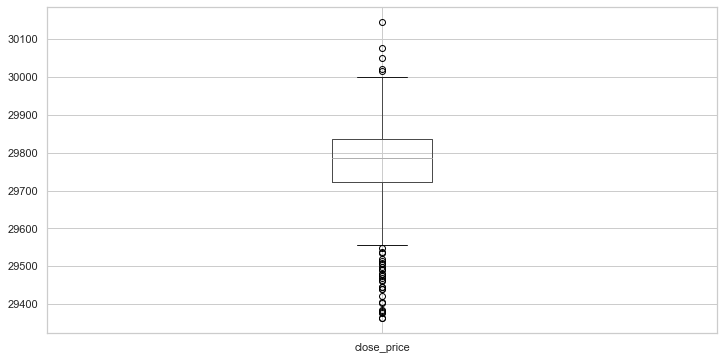

In [ ]:
# review outliers
df_data.boxplot(['close_price'])

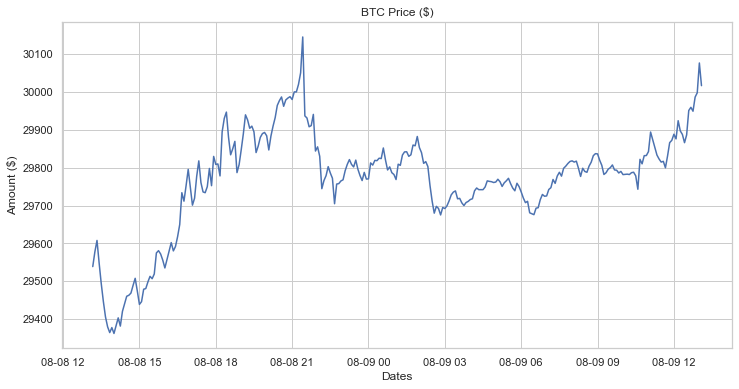

In [ ]:
# draw linechart
plt.plot()
plt.plot(df_data.datetime, df_data.close_price)
plt.title('BTC Price ($)')
plt.xlabel('Dates')
plt.ylabel('Amount ($)')
plt.rcParams["figure.figsize"] = (12,6)

plt.show()

In [ ]:
# cleaning data process
df_close_price = df_data['close_price']
Q1 = df_close_price.quantile(.25)
Q3 = df_close_price.quantile(.75)
IIQ = Q3 - Q1
lower_limit = Q1 - 1.5 * IIQ
upper_limit = Q3 + 1.5 * IIQ
df_data_cleaned = df_data.query(f'close_price >= {lower_limit} and close_price <= {upper_limit}')

In [ ]:
# get index of the max close price and the min close price

x_date_sell_index = df_data_cleaned['close_price'].idxmax()
x_date_buy_index = df_data_cleaned['close_price'].idxmin()
print(x_date_sell_index, x_date_buy_index)

96 33


In [ ]:
# get datetime of the indexes above: min max
x_date_sell = df_data_cleaned.loc[x_date_sell_index]['datetime']
x_date_buy = df_data_cleaned.loc[x_date_buy_index]['datetime']
print(x_date_sell, x_date_buy)

2023-08-08 21:10:00 2023-08-08 15:55:00


In [ ]:
# get price of the indexes above: min max
y_price_sell = df_data_cleaned.loc[x_date_sell_index]['close_price']
y_price_buy = df_data_cleaned.loc[x_date_buy_index]['close_price']
print(y_price_sell, y_price_buy)

30000.0 29556.01


In [ ]:
# best profit: amount you would earn if you would buy and sell in the best moment (green and red line in chart)
best_profit = y_price_sell - y_price_buy
best_profit = round(best_profit,2)
best_profit

443.99

In [ ]:
# best profit time: time you wait to get the best profit (green and red line in chart)
best_profit_timedelta = x_date_sell - x_date_buy
best_profit_timedelta.seconds
best_profit_hours = best_profit_timedelta.seconds // 3600
best_profit_minutes = (best_profit_timedelta.seconds % 3600) // 60
best_profit_time = f'{best_profit_hours}h {best_profit_minutes}m'
best_profit_time

'5h 15m'

In [ ]:
# positions according to values of dataframe, this works to put a good positions the buy and sell message (y axis)
y_interval= (y_price_sell - y_price_buy) / 7
y_interval

63.42714285714309

In [ ]:
# to draw the initial amount, blue dashed line
first_result = df_data_cleaned.iloc[0]
print(first_result.datetime, first_result.close_price)

2023-08-08 13:15:00 29578.0


In [ ]:
# to draw the end amount, blue dashed line
last_result = df_data_cleaned.iloc[-1]
print(last_result.datetime, last_result.close_price)

2023-08-09 12:55:00 29997.65


In [ ]:
# behavior of the las 24 hrs
last_24h_price = last_result.close_price - first_result.close_price
last_24h_price = round(last_24h_price,2)
if last_24h_price > 0:
    last_24h_price_status= 'INCREASED'
else:
    last_24h_price_status= 'DECREASED'

In [ ]:
# to get the midnight time in dataframe, It is not drawed in the chart yet
from datetime import datetime, time
df_data_cleaned['date'] = df_data_cleaned['datetime'].dt.date
df_data_cleaned
df_dates = df_data_cleaned['date'].drop_duplicates()
for dates in df_dates:
    print(type(dates))
    midnight_date = datetime.combine(dates, datetime.min.time())
    print(midnight_date)
    index_values = df_data_cleaned[df_data_cleaned['datetime'] == midnight_date].index
    print(index_values)


<class 'datetime.date'>
2023-08-08 00:00:00
Int64Index([], dtype='int64')
<class 'datetime.date'>
2023-08-09 00:00:00
Int64Index([130], dtype='int64')


C:\Users\oscar\AppData\Local\Temp\ipykernel_29980\3094090554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_cleaned['date'] = df_data_cleaned['datetime'].dt.date


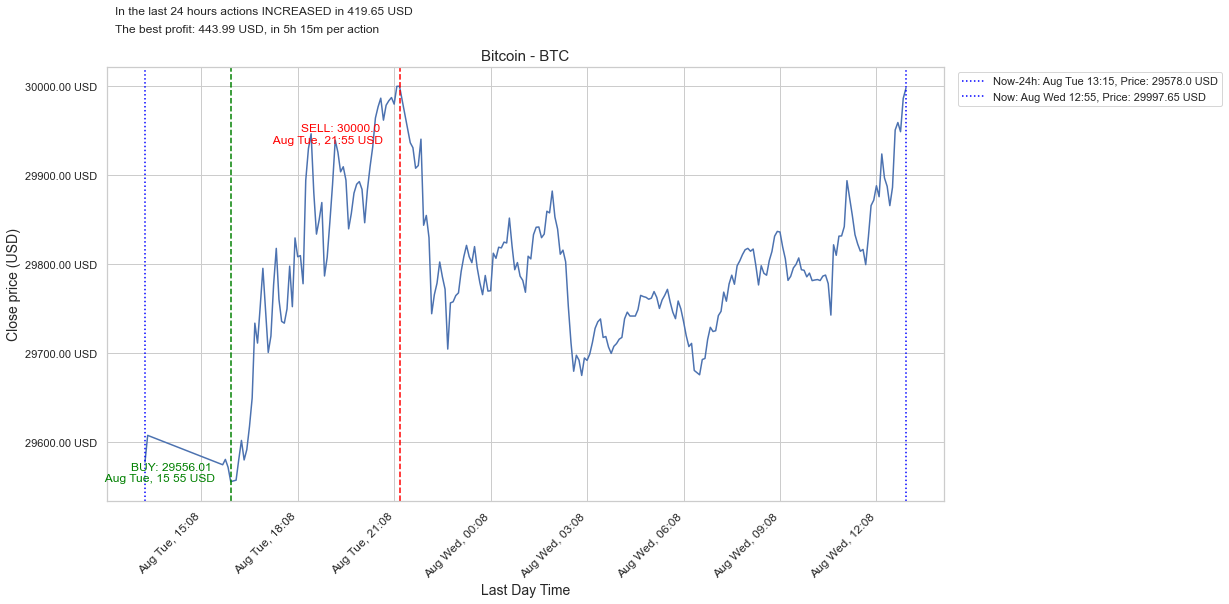

In [ ]:
# draw the chart
from matplotlib.dates import DateFormatter
# size of the chart
plt.figure(figsize=(15, 8))
# to put grid
sns.set(style="whitegrid")
sns.lineplot(x=df_data_cleaned.datetime, y=df_data_cleaned.close_price)

# messages green and red into the chart
show_date_sell = f'{x_date_sell.strftime("%b")} {x_date_buy.strftime("%a")}, {x_date_sell.strftime("%H")}:{x_date_buy.strftime("%M")}'
show_date_buy = f'{x_date_buy.strftime("%b")} {x_date_buy.strftime("%a")}, {x_date_buy.strftime("%H")} {x_date_buy.strftime("%M")}'

# messages in the legend (right side)
show_first_result = f'{first_result.datetime.strftime("%b")} {first_result.datetime.strftime("%a")} {first_result.datetime.strftime("%H")}:{first_result.datetime.strftime("%M")}, Price: {first_result.close_price} USD'
show_last_result = f'{last_result.datetime.strftime("%b")} {last_result.datetime.strftime("%a")} {last_result.datetime.strftime("%H")}:{last_result.datetime.strftime("%M")}, Price: {last_result.close_price} USD'

# title
plt.title('Bitcoin - BTC', fontsize=15)

# message in the upper left side
plt.text(0.01, 1.12, f'In the last 24 hours actions {last_24h_price_status} in {last_24h_price} USD', fontsize=12, ha='left', transform=plt.gca().transAxes)
plt.text(0.01, 1.08, f'The best profit: {best_profit} USD, in {best_profit_time} per action', fontsize=12, ha='left', transform=plt.gca().transAxes)

# draw lines of the best momento of buy and sell
plt.axvline(x=x_date_buy, color='green', linestyle='--')
plt.axvline(x=x_date_sell, color='red', linestyle='--')

# messages of the buy and sell moment
plt.text(
    x_date_sell - timedelta(hours=0.5),
    y_price_sell - y_interval,
    f'SELL: {y_price_sell} \n {show_date_sell} USD',
    fontsize=12,
    ha='right',
    color = 'red'
)

plt.text(
    x_date_buy - timedelta(hours=0.5),
    y_price_buy,
    f'BUY: {y_price_buy} \n {show_date_buy} USD',
    fontsize=12,
    ha='right',
    color = 'green'
)

# draw first_result 24 hrs ago
plt.axvline(x=first_result.datetime, color='blue', linestyle=':', label= f'Now-24h: {show_first_result}')

# draw last result of now (5 min of delay aprox)
plt.axvline(x=last_result.datetime, color='blue', linestyle=':', label = f'Now: {show_last_result}')

# labels for 'x' and 'y' axis
plt.ylabel('Close price (USD)', fontsize=14)
plt.xlabel('Last Day Time', fontsize=14)

# declared legend outside of the chart
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))

# to convert datetime into: Aug Tue 12:08, to better legibility
month_day_time = DateFormatter("%b %a, %H:%m")
plt.gca().xaxis.set_major_formatter(month_day_time)

# to add USD suffix in amounts in y axis
plt.gca().yaxis.set_major_formatter('{x:1.2f} USD')

# to format x axis to rotate 45 grades and other settings
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='12',
)

# create the chart
plt.show()